IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
path="C:\\Users\\Dell\\Downloads\\hand\\leapGestRecog\\00"

LOAD DATASET

In [3]:
from tqdm import tqdm
import cv2
import os
data,tar=[],[]
for dir in tqdm(os.listdir(path)):
    dir_p=os.path.join(path+"//"+dir)
    for img in tqdm(os.listdir(dir_p)):
        img_r=cv2.imread(os.path.join(dir_p+"//"+img))
        img_res=cv2.resize(img_r,(320,120))
        img_nor=img_res/255.0
        data.append(img_nor.flatten())
        tar.append(dir)
data=np.array(data)
tar=np.array(tar)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.43it/s]


In [71]:
from PIL import Image
sample="C:\\Users\\Dell\\Downloads\\hand\\leapGestRecog\\00\\01_palm\\frame_00_01_0177.png"
img = Image.open(sample)
img.show()

In [66]:
data.shape

(2000, 115200)

In [5]:
tar

array(['01_palm', '01_palm', '01_palm', ..., '10_down', '10_down',
       '10_down'], dtype='<U13')

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
target=le.fit_transform(tar)
target

array([0, 0, 0, ..., 9, 9, 9], dtype=int64)

CREATE MODEL

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
input_shape=(115200,)

model = Sequential()
model.add(Dense(128,activation='relu',input_shape=input_shape))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax')) 

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               14745728  
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 14756394 (56.29 MB)
Trainable params: 14756394 (56.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.3,random_state=2)

In [9]:
x_train.shape

(1400, 115200)

In [10]:
y_train.shape

(1400,)

In [11]:
x_test.shape

(600, 115200)

In [12]:
y_test.shape

(600,)

FITTING THE MODEL

In [42]:
from tensorflow.keras.callbacks import EarlyStopping
es= EarlyStopping(monitor='loss',patience=3,restore_best_weights=True)
history = model.fit(x_train,y_train,epochs=10,callbacks=[es], verbose=1)

Epoch 1/10
44/44 [==============================] - 5s 86ms/step - loss: 2.0006 - accuracy: 0.6564
Epoch 2/10
44/44 [==============================] - 4s 89ms/step - loss: 0.0492 - accuracy: 0.9936
Epoch 3/10
44/44 [==============================] - 4s 88ms/step - loss: 0.0123 - accuracy: 0.9979
Epoch 4/10
44/44 [==============================] - 4s 85ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 5/10
44/44 [==============================] - 4s 87ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 6/10
44/44 [==============================] - 4s 88ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 7/10
44/44 [==============================] - 4s 89ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 8/10
44/44 [==============================] - 4s 96ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 9/10
44/44 [==============================] - 4s 96ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 10/10
44/44 [==============================] - 4s 89ms/step - loss: 8.9407e-04 - accuracy: 1.0000


In [43]:
loss,accuracy = model.evaluate(x_test,y_test,verbose=1)
print("Loss:",loss)
print("Accuracy:",accuracy)

19/19 [==============================] - 0s 13ms/step - loss: 0.0053 - accuracy: 0.9983
Loss: 0.0052924915216863155
Accuracy: 0.9983333349227905


In [51]:
y_pred=model.predict(x_test)

19/19 [==============================] - 0s 15ms/step


In [52]:
predicted=np.argmax(y_pred, axis=1)
y_pred=predicted

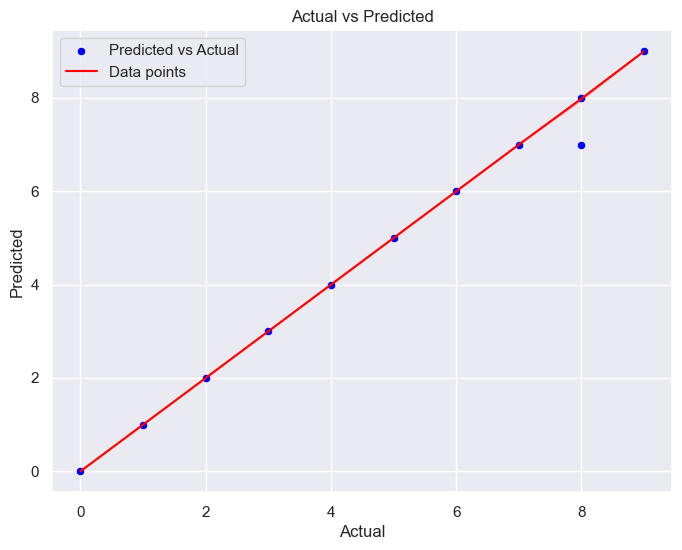

In [65]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_true,y=y_pred, color='blue', label='Predicted vs Actual')
sns.lineplot(x=y_true,y=y_pred, color='red', label='Data points')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()